## Clova Face Recognition API를 이용한 데이터 점검 (성별, 나이) - (2)
> 작성자: 유승리_T3129 / 작성일: 22.02.23.수
- (1)번에서 뽑았던 dataframe `no_mask_api_final.pkl`를 활용한 분석

### 1. dataframe 불러오기

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os
from pathlib import Path
import requests
import json 
import re
import pickle

pd.set_option('display.max_colwidth', 100)

In [3]:
with open( "./no_mask_api_final.pkl", "rb" ) as file:
    no_mask_api = pickle.load(file)
no_mask_api

,gender_data,gender_api,gender_conf_api,age_data,age_group_data,age_api,age_group_api,age_conf_api,label,path
0,1,1,0.999806,45,1,53.0,1,0.763184,13,000001_female_Asian_45/normal.jpg
1,1,1,0.508885,52,1,52.0,1,0.987685,13,000002_female_Asian_52/normal.jpg
2,0,0,0.999874,54,1,45.0,1,0.110434,13,000004_male_Asian_54/normal.jpg
3,1,0,0.999967,58,1,66.0,2,0.489103,13,000005_female_Asian_58/normal.jpg
4,1,0,0.746899,59,1,60.0,2,0.415534,13,000006_female_Asian_59/normal.jpg
...,...,...,...,...,...,...,...,...,...,...
2695,0,0,0.999997,19,0,22.0,0,0.774581,12,006954_male_Asian_19/normal.jpg
2696,0,0,0.999995,19,0,19.0,0,0.460716,12,006955_male_Asian_19/normal.jpg
2697,0,0,0.999997,19,0,17.0,0,0.927676,12,006956_male_Asian_19/normal.jpg
2698,0,0,0.995121,20,0,23.0,0,0.550162,12,006957_male_Asian_20/normal.jpg


In [4]:
train_dir = '../../input/data/train/images'  # 환경에 맞게 수정 필요

def path(x):
    x = os.path.join(train_dir, x)
    return x

no_mask_api["path"] = no_mask_api["path"].apply(path)
no_mask_api

,gender_data,gender_api,gender_conf_api,age_data,age_group_data,age_api,age_group_api,age_conf_api,label,path
0,1,1,0.999806,45,1,53.0,1,0.763184,13,../../input/data/train/images/000001_female_Asian_45/normal.jpg
1,1,1,0.508885,52,1,52.0,1,0.987685,13,../../input/data/train/images/000002_female_Asian_52/normal.jpg
2,0,0,0.999874,54,1,45.0,1,0.110434,13,../../input/data/train/images/000004_male_Asian_54/normal.jpg
3,1,0,0.999967,58,1,66.0,2,0.489103,13,../../input/data/train/images/000005_female_Asian_58/normal.jpg
4,1,0,0.746899,59,1,60.0,2,0.415534,13,../../input/data/train/images/000006_female_Asian_59/normal.jpg
...,...,...,...,...,...,...,...,...,...,...
2695,0,0,0.999997,19,0,22.0,0,0.774581,12,../../input/data/train/images/006954_male_Asian_19/normal.jpg
2696,0,0,0.999995,19,0,19.0,0,0.460716,12,../../input/data/train/images/006955_male_Asian_19/normal.jpg
2697,0,0,0.999997,19,0,17.0,0,0.927676,12,../../input/data/train/images/006956_male_Asian_19/normal.jpg
2698,0,0,0.995121,20,0,23.0,0,0.550162,12,../../input/data/train/images/006957_male_Asian_20/normal.jpg


### 2. `gender_data`와 `gender_api`가 다른 경우 (총 487개)
- 실제 사진
- 개수(비율) 비교
- confidence

In [25]:
# gender_data != gender_api
different_gender = no_mask_api[no_mask_api["gender_data"] != no_mask_api["gender_api"]]

In [26]:
different_gender

,gender_data,gender_api,gender_conf_api,age_data,age_group_data,age_api,age_group_api,age_conf_api,label,path
3,1,0,0.999967,58,1,66.0,2,0.489103,13,../../input/data/train/images/000005_female_Asian_58/normal.jpg
4,1,0,0.746899,59,1,60.0,2,0.415534,13,../../input/data/train/images/000006_female_Asian_59/normal.jpg
5,1,0,0.698803,58,1,67.0,2,0.645071,13,../../input/data/train/images/000007_female_Asian_58/normal.jpg
6,1,0,0.999971,58,1,74.0,2,0.288556,13,../../input/data/train/images/000008_female_Asian_58/normal.jpg
7,1,0,0.999783,56,1,70.0,2,0.308341,13,../../input/data/train/images/000009_female_Asian_56/normal.jpg
...,...,...,...,...,...,...,...,...,...,...
2608,0,1,0.975103,19,0,25.0,0,0.223423,12,../../input/data/train/images/006661_male_Asian_19/normal.jpeg
2616,0,1,0.369878,19,0,18.0,0,0.525888,12,../../input/data/train/images/006671_male_Asian_19/normal.jpeg
2619,0,1,0.848592,19,0,19.0,0,0.350252,12,../../input/data/train/images/006674_male_Asian_19/normal.jpg
2655,0,1,0.996856,19,0,11.0,0,0.755006,12,../../input/data/train/images/006728_male_Asian_19/normal.jpg


#### 2.1 `different_gender`에 해당하는 모든 이미지 출력
- api로 판단한 `gender`와 라벨링 된 `gender`가 다른 경우
- 잘못된 라벨링을 파악하기 위함

In [38]:
import matplotlib.image as mpimg
import re

In [ ]:
plt.figure(figsize=(25, 200))
c = re.compile('[0-9]{6}')

for index, line in enumerate(different_gender.iloc):
    img = mpimg.imread(line["path"])
    plt.subplot(55, 9, index+1)
    t = line["path"].split("/")[6].split("_")
    plt.title(f"{t[0]}-{t[1]}-{t[3]}")
    plt.axis('off')
    plt.imshow(img)

#### 2.2 성별 판단이 어려울 것으로 보이는 경우에 대한 추측
- 헤어 스타일
- 연령대 - 아무래도 연령대가 높을수록 헤어 스타일 & 옷 등 때문에 판단이 어려운 듯
- 옷 색깔 (ex. 빨간색 옷)

#### 2.3 라벨링 잘못된 듯한 부분
- `006359` ~ `006364` - 남성인데 여성으로 라벨링 되어있음

#### 2.4 API로 판별이 어려워보이는 케이스의 `gender_data`별 `age_data` 분포 
> API로 판별이 어렵다면 우리의 모델에서도 판별이 어려울 수 있다.
- 남성
    - 남성을 여성으로 판단하는 경우는 비교적 적었다.
    - `006359` ~ `006364`에 라벨링이 잘못된 부분을 고쳐야 할 것 같다. (`age_data == 18`)
- 여성
    - 여성을 남성으로 판단하는 경우는 비교적 많았다.
    - 50 ~ 60대일수록 짧은 헤어스타일 & 화려한 옷 때문에 API로 판별이 어려워보인다.
        - 하지만 우리의 train data로 학습을 진행할 것이니 이 API를 사용할 때보다는 성능이 괜찮지 않을까.
    - 빨간 져지를 입은 여성들이 남성으로 잘못 판단되는 경우가 눈에 띄게 보였다.
    

In [66]:
group = different_gender.groupby("gender_data")["age_data"].value_counts().sort_index()
group

gender_data  age_data
0            19          11
             20           1
             22           2
             23           1
             25           1
             43           1
             47           1
             57           1
             60           1
1            18          20
             19          18
             20          15
             21           1
             22           2
             23           2
             24           6
             25           4
             26           2
             30           3
             31           1
             32           1
             34           1
             35           2
             36           2
             38           2
             39           1
             40           4
             42           1
             43           1
             44           3
             45           5
             46           2
             47           2
             48           9
             49          1

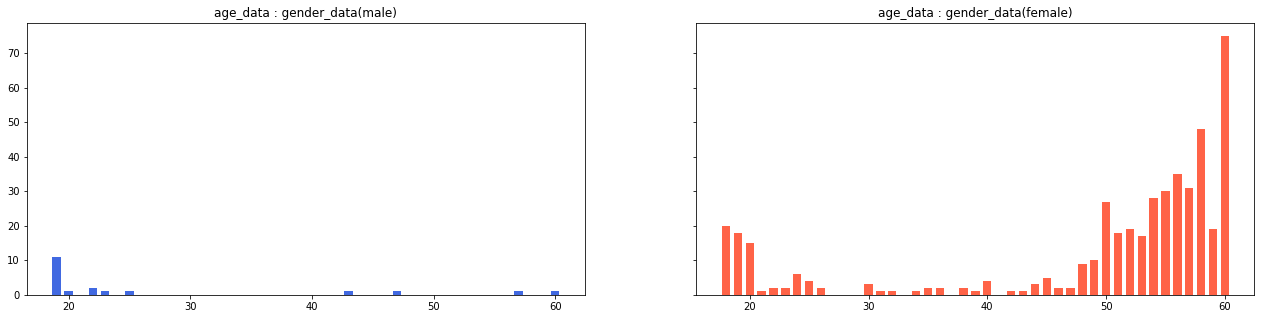

In [82]:
# 실제 데이터 라벨링 된 연령대 & 성별 별 API가 잘못 판단한 데이터 개수

fig, ax = plt.subplots(1, 2,figsize=(22, 5), sharey=True)
ax[0].bar(group[0].index, group[0], color='royalblue', width=0.7, linewidth=2)
ax[0].set_title('age_data : gender_data(male)')
ax[1].bar(group[1].index, group[1], color='tomato', width=0.7, linewidth=2)
ax[1].set_title('age_data : gender_data(female)')
plt.show()

### 3. `age_group_data`와 `age_group_api`가 다른 경우 (총 1045개)

In [83]:
# age_group_data != age_group_api
different_age_group = no_mask_api[no_mask_api["age_group_data"] != no_mask_api["age_group_api"]]
different_age_group

,gender_data,gender_api,gender_conf_api,age_data,age_group_data,age_api,age_group_api,age_conf_api,label,path
3,1,0,0.999967,58,1,66.0,2,0.489103,13,../../input/data/train/images/000005_female_Asian_58/normal.jpg
4,1,0,0.746899,59,1,60.0,2,0.415534,13,../../input/data/train/images/000006_female_Asian_59/normal.jpg
5,1,0,0.698803,58,1,67.0,2,0.645071,13,../../input/data/train/images/000007_female_Asian_58/normal.jpg
6,1,0,0.999971,58,1,74.0,2,0.288556,13,../../input/data/train/images/000008_female_Asian_58/normal.jpg
7,1,0,0.999783,56,1,70.0,2,0.308341,13,../../input/data/train/images/000009_female_Asian_56/normal.jpg
...,...,...,...,...,...,...,...,...,...,...
2653,0,0,0.998186,19,0,30.0,1,1.000000,12,../../input/data/train/images/006726_male_Asian_19/normal.jpg
2679,0,0,0.952035,19,0,35.0,1,0.498354,12,../../input/data/train/images/006924_male_Asian_19/normal.jpg
2683,0,0,0.976993,19,0,36.0,1,0.191420,12,../../input/data/train/images/006934_male_Asian_19/normal.jpg
2684,0,0,0.999994,20,0,42.0,1,0.208150,12,../../input/data/train/images/006941_male_Asian_20/normal.jpg


In [11]:
# age_group_data와 age_group_api가 두 단계 차이나는 경우는 없었다.

no_mask_api[abs(no_mask_api["age_group_data"] - no_mask_api["age_group_api"]) == 2]

,gender_data,gender_api,gender_conf_api,age_data,age_group_data,age_api,age_group_api,age_conf_api,label,path


#### 3.1 API로 판별이 어려워보이는 케이스의 gender_data별 age_data 분포

In [84]:
group = different_age_group.groupby("gender_data")["age_data"].value_counts().sort_index()
group

gender_data  age_data
0            18            3
             19           17
             20            9
             21            4
             22            1
                        ... 
1            56           71
             57           59
             58          100
             59           37
             60            4
Name: age_data, Length: 74, dtype: int64

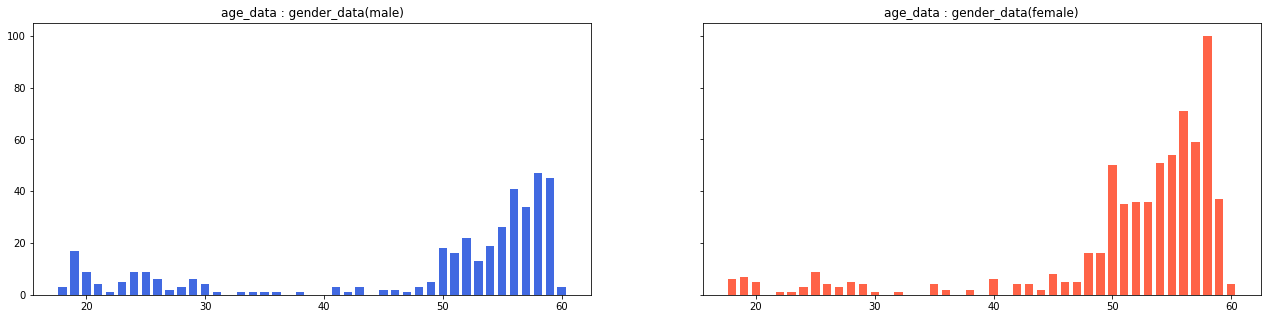

In [85]:
fig, ax = plt.subplots(1, 2,figsize=(22, 5), sharey=True)
ax[0].bar(group[0].index, group[0], color='royalblue', width=0.7, linewidth=2)
ax[0].set_title('age_data : gender_data(male)')
ax[1].bar(group[1].index, group[1], color='tomato', width=0.7, linewidth=2)
ax[1].set_title('age_data : gender_data(female)')
plt.show()

### 4. 생각해 볼 것
- 연령대가 높은(50 ~ 60대) 여성 데이터에 대해서 어떤 처리가 필요할지
    - 짧은 헤어스타일
    - 화려한 무늬의 상의
- `30<=age<60`과 `age>=60`의 경계에 대해서 어떤 처리가 필요할지
- 라벨링(`gender`)이 잘 못 됐을 케이스를 찾기 위해 **2.1**의 출력 결과 살펴보기